In [4]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Glass Identification Dataset. It consists of 214 observations from each of seven types of glasses. Ten features were measured from each sample.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/glass+identification

**Train the KNN algorithm to be able to distinguish the type of glass from one another given the measurements of the 10 features.**

## Question 1 - 1 point

Import the data set and print 10 random rows from the data set

In [67]:
import pandas as pd
import random
import numpy as np
from scipy import stats
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
NNH = KNeighborsClassifier(n_neighbors= 5 )
bc_df = pd.read_csv("Glass.csv")
bc_df.shape
bc_df.sample(n=10)

,ID,RI,NA,MG,AI,SI,K,CA,BA,FE,Type
42,43,1.51779,13.21,3.39,1.33,72.76,0.59,8.59,0.00,0.00,1
55,56,1.51769,12.45,2.71,1.29,73.70,0.56,9.06,0.00,0.24,1
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
46,47,1.51869,13.19,3.37,1.18,72.72,0.57,8.83,0.00,0.16,1
113,114,1.51892,13.46,3.83,1.26,72.55,0.57,8.21,0.00,0.14,2
193,194,1.51719,14.75,0.00,2.00,73.02,0.00,8.53,1.59,0.08,7
59,60,1.51754,13.39,3.66,1.19,72.79,0.57,8.27,0.00,0.11,1
163,164,1.51514,14.01,2.68,3.50,69.89,1.68,5.87,2.20,0.00,5
83,84,1.51594,13.09,3.52,1.55,72.87,0.68,8.05,0.00,0.09,2
52,53,1.51808,13.43,2.87,1.19,72.84,0.55,9.03,0.00,0.00,1


## Data Pre-processing

## Question 2 - Check for missing values. - 1 point

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median/mean) *

In [5]:
bc_df.fillna(bc_df.mean())

,ID,RI,NA,MG,AI,SI,K,CA,BA,FE,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,1


## Question 3 - Create Box plots for all the independent features to check the outliers - 1 point


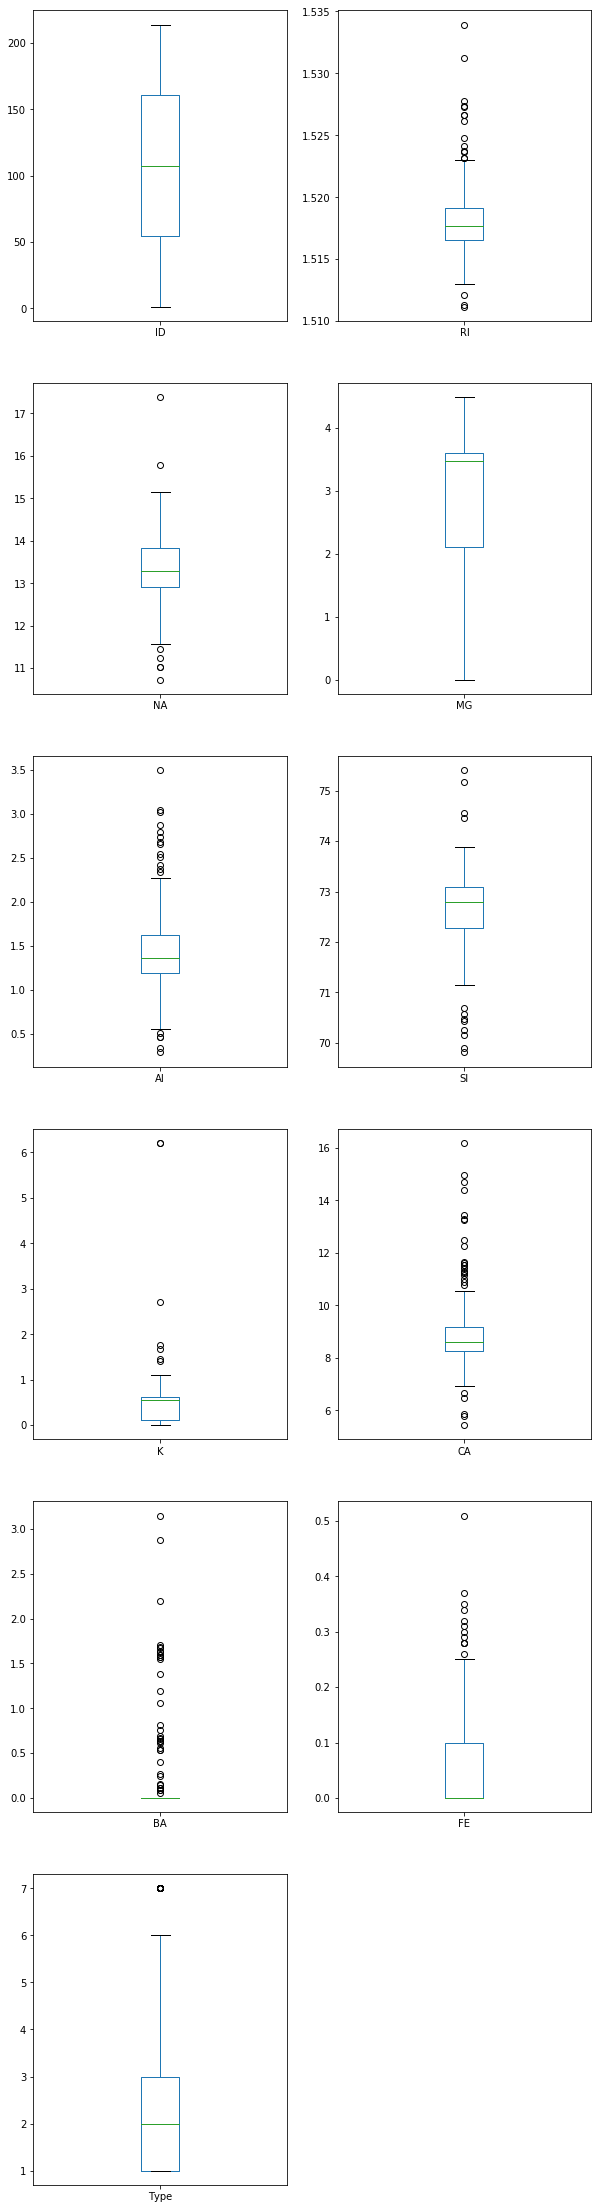

In [47]:
import matplotlib.pyplot as plt
bc_df.plot(kind='box', subplots=True,  figsize=(10,40),layout=(6,2))
plt.show()

## Question 4 - Check for Variance- 1 point

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [54]:
print(bc_df.describe())
print("As the Standard Deviation is not near to 0 for columns RI,FE, So Variance is less than 0.1, so we can drop the column RI,FE. We can also deop ID column as this is not influencying the model")

               NA          MG          AI          SI           K          CA  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean    13.407850    2.684533    1.444907   72.650935    0.497056    8.956963   
std      0.816604    1.442408    0.499270    0.774546    0.652192    1.423153   
min     10.730000    0.000000    0.290000   69.810000    0.000000    5.430000   
25%     12.907500    2.115000    1.190000   72.280000    0.122500    8.240000   
50%     13.300000    3.480000    1.360000   72.790000    0.555000    8.600000   
75%     13.825000    3.600000    1.630000   73.087500    0.610000    9.172500   
max     17.380000    4.490000    3.500000   75.410000    6.210000   16.190000   

               BA        Type  
count  214.000000  214.000000  
mean     0.175047    2.780374  
std      0.497219    2.103739  
min      0.000000    1.000000  
25%      0.000000    1.000000  
50%      0.000000    2.000000  
75%      0.000000    3.000000  
max      3.150

In [52]:
#bc_df = bc_df.drop(labels = "ID", axis = 1)
bc_df = bc_df.drop(labels = "RI", axis = 1)
bc_df = bc_df.drop(labels = "FE", axis = 1)
bc_df

,NA,MG,AI,SI,K,CA,BA,Type
0,13.64,4.49,1.10,71.78,0.06,8.75,0.00,1
1,13.89,3.60,1.36,72.73,0.48,7.83,0.00,1
2,13.53,3.55,1.54,72.99,0.39,7.78,0.00,1
3,13.21,3.69,1.29,72.61,0.57,8.22,0.00,1
4,13.27,3.62,1.24,73.08,0.55,8.07,0.00,1
5,12.79,3.61,1.62,72.97,0.64,8.07,0.00,1
6,13.30,3.60,1.14,73.09,0.58,8.17,0.00,1
7,13.15,3.61,1.05,73.24,0.57,8.24,0.00,1
8,14.04,3.58,1.37,72.08,0.56,8.30,0.00,1
9,13.00,3.60,1.36,72.99,0.57,8.40,0.00,1


## Question 5 - 1 point

*Plot the scatter matrix for all the variables.*

C:\Users\desatapa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F227470>,
      dtype=object)

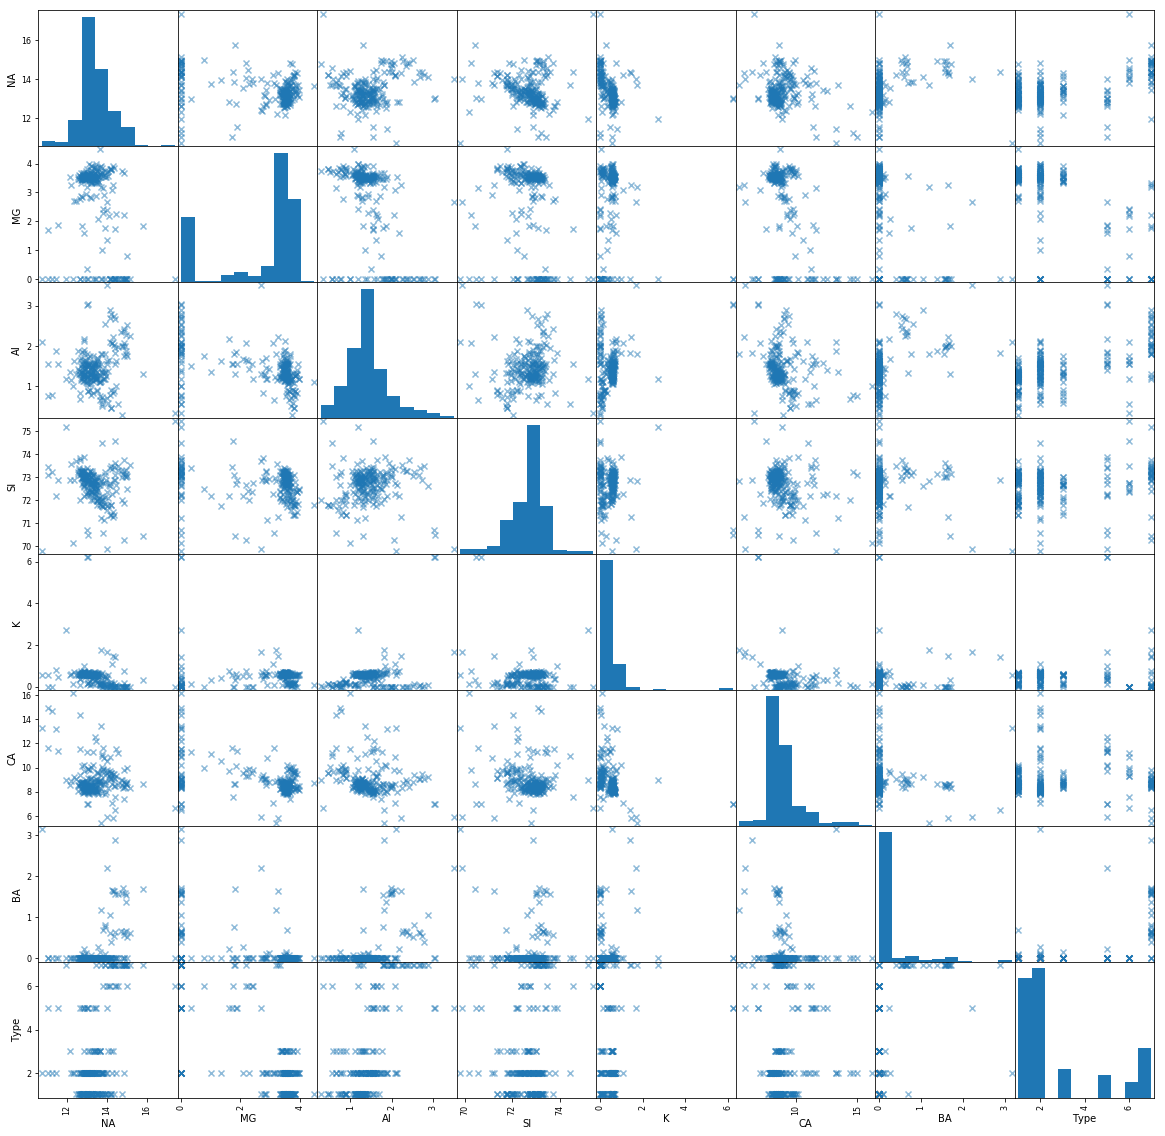

In [53]:
from pandas.tools.plotting import scatter_matrix
colors=['red','green']
scatter_matrix(bc_df,figsize=[20,20],marker='x')

## Question 6 - Model - 2 points

*Split the data in test and train sets and build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,6,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [55]:
bc_labels = bc_df["Type"]
bc_feature_df = bc_df.drop(labels= "Type" , axis = 1)

In [56]:
bc_feature_df_z = bc_feature_df.apply(zscore)  # convert all attributes to Z scale 

bc_feature_df_z.describe()

,NA,MG,AI,SI,K,CA,BA
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,2.179980e-15,-2.801497e-16,-3.434428e-16,9.966067e-16,7.470660e-17,-3.137418e-16,-1.763906e-16
std,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00
min,-3.286943e+00,-1.865511e+00,-2.318616e+00,-3.676472e+00,-7.639186e-01,-2.484084e+00,-3.528768e-01
25%,-6.141580e-01,-3.957744e-01,-5.117560e-01,-4.800288e-01,-5.756501e-01,-5.049657e-01,-3.528768e-01
50%,-1.323817e-01,5.527787e-01,-1.704602e-01,1.799655e-01,8.905322e-02,-2.514132e-01,-3.528768e-01
75%,5.120326e-01,6.361680e-01,3.715977e-01,5.649621e-01,1.735820e-01,1.518057e-01,-3.528768e-01
max,4.875637e+00,1.254639e+00,4.125851e+00,3.570524e+00,8.780145e+00,5.094318e+00,5.997210e+00


In [57]:
X = np.array(bc_feature_df_z)
X.shape

(214, 7)

In [58]:
y = np.array(bc_labels)
y.shape

(214,)

In [59]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [60]:
X

array([[ 0.28495326,  1.25463857, -0.69244192, ..., -0.67170546,
        -0.14576634, -0.35287683],
       [ 0.59181718,  0.63616803, -0.17046023, ..., -0.02621325,
        -0.79373376, -0.35287683],
       [ 0.14993314,  0.60142249,  0.19091171, ..., -0.16453301,
        -0.82894938, -0.35287683],
       ...,
       [ 1.16872135, -1.86551055,  1.15457021, ..., -0.76391864,
        -0.36410319,  2.95320036],
       [ 1.19327046, -1.86551055,  0.99396046, ..., -0.76391864,
        -0.33593069,  2.81208731],
       [ 1.00915211, -1.86551055,  1.27502753, ..., -0.76391864,
        -0.23732695,  3.01367739]])

In [61]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [62]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [63]:
y_predict = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.7230769230769231

In [68]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

myList =[3,6,9]


# empty list that will hold cv scores
cv_scores1 = []
k_neighbors1 = []

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores1.append(scores.mean())
    k_neighbors1.append(k)


MSE = [1 - x for x in cv_scores1]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

The optimal number of neighbors is 3


## Question 7 - Cross Validation - 2 points

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [69]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
myList = list(range(1,50))


# empty list that will hold cv scores
cv_scores = []
k_neighbors = []

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)


MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

The optimal number of neighbors is 1


## Question 8 - 1 point

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

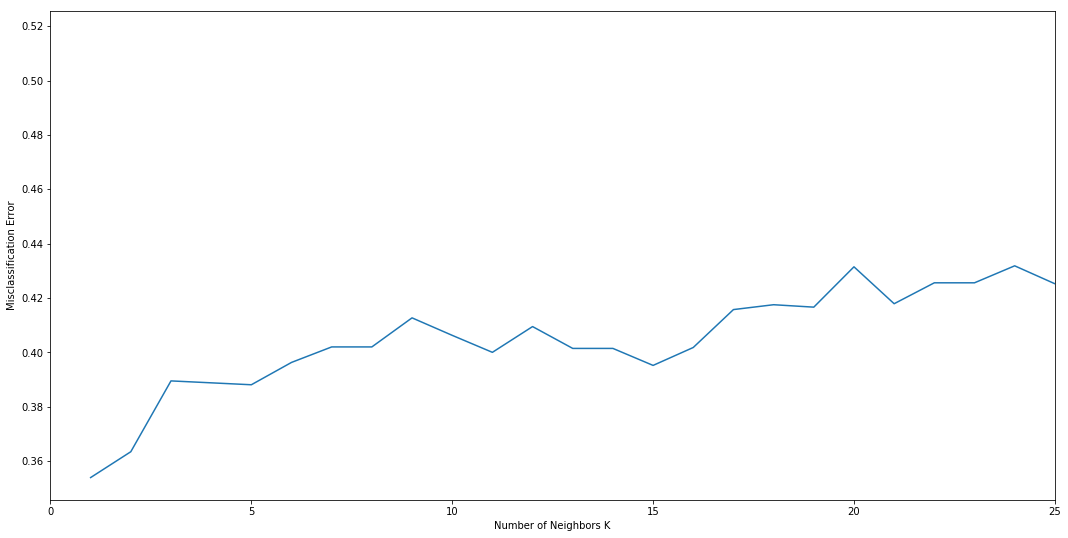

In [66]:
%matplotlib inline 
import matplotlib.pyplot as plt

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.xlim(0,25)


# plot misclassification error vs k
plt.plot(k_neighbors, MSE)



plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()